In [1]:
#imporing libraries required to read csv file and to understand data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
car_details=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
car_details.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 1. * ***value counts of each row where dtype='object'***

In [3]:
car_details['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [4]:
car_details['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [5]:
car_details['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [6]:
car_details['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

# 2. * **Finding Relation between independent cols and dependent col using corr()****

* **Detecting Outliers****

In [7]:
car_details.corr()['Selling_Price'].sort_values()

Owner           -0.088344
Kms_Driven       0.029187
Year             0.236141
Present_Price    0.878983
Selling_Price    1.000000
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

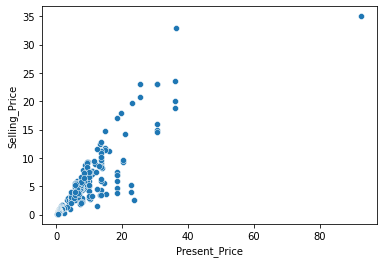

In [8]:
sns.scatterplot(data=car_details,y='Selling_Price',x='Present_Price')

In [9]:
car_details[(car_details['Present_Price']>=35) & (car_details['Selling_Price']>=30)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

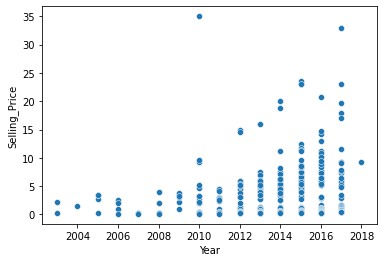

In [10]:
sns.scatterplot(data=car_details,y='Selling_Price',x='Year')

In [11]:
outliers_index=car_details[(car_details['Selling_Price']>=30) & (car_details['Year']>=2010)].index
outliers_index

Int64Index([64, 86], dtype='int64')

1. ->Selling_price Dependent on Present_price and Year So we try to find realtion between these cols using scatter plot
2. ->We found that selling_price will be increasing with respective to Present_price But we can Observe the increase of Selling_price is low when compared to Present_price beccuse there ratio is lessthan 1 
3. ->By observing both the graphs we tried to fing outliers and removed them by finding their index in next two cells and graphs after removing outliers is shown below 
4. ->By Above the two graphs we found index of outliers from both graphs are same

In [12]:
car_details=car_details.drop(outliers_index,axis=0)

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

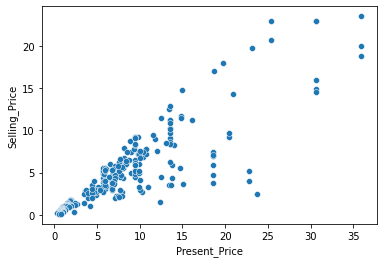

In [13]:
sns.scatterplot(data=car_details,y='Selling_Price',x='Present_Price')

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

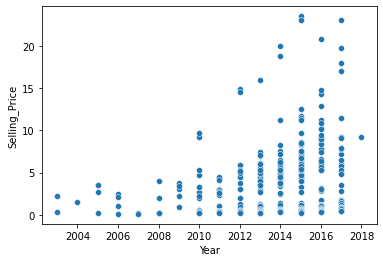

In [14]:
sns.scatterplot(data=car_details,y='Selling_Price',x='Year')

1. * **relation between independent cols and dependent col after removing outliers****

In [15]:
car_details.corr()['Selling_Price'].sort_values()

Owner           -0.092628
Kms_Driven       0.026114
Year             0.273127
Present_Price    0.880358
Selling_Price    1.000000
Name: Selling_Price, dtype: float64

1. * **Now we try to encode object cols to int or float cols swo we can find some relation among these cols and depedent col(selling_price)
2. * for that we can use OneHotEncoder or LabelEncoder(from sklearn.preprocessing import LabelEncoder,OneHotEncoder)
3. * Here Value_counts for object col is less than 3 so we can choose LabelEncoder or we can use 'replace'
4. * Here Using LabelEncoder or using replace gives returns same col****

In [16]:
car_details['Seller_Type']=car_details['Seller_Type'].replace('Dealer',0)
car_details['Seller_Type']=car_details['Seller_Type'].replace('Individual',1)
  

car_details['Transmission']=car_details['Transmission'].replace('Manual',0)
car_details['Transmission']=car_details['Transmission'].replace('Automatic',1)


car_details['Fuel_Type']=car_details['Fuel_Type'].replace('Petrol',0)
car_details['Fuel_Type']=car_details['Fuel_Type'].replace('Diesel',1)
car_details['Fuel_Type']=car_details['Fuel_Type'].replace('CNG',2)

In [17]:
car_details.isnull().sum()  #Make Sure there are no null_values in the data. If there are null values use 'impute' library to fill them

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
#Importing Regression Models,train_test_split(to split data into train and test),polynomialfeatures,and metrics to evaluate our model

from sklearn.linear_model import LinearRegression,RidgeCV,Ridge,LassoCV,Lasso,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

#spliting data into train and test

x=car_details.drop(['Car_Name','Selling_Price'],axis=1)
y=car_details['Selling_Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


#Feature Scaling
#try using various degree for polynomialfeatures to find best features

train_preds=[]
test_preds=[]
for i in range(1,7):
  model=LinearRegression()
  poly=PolynomialFeatures(degree=i,include_bias=False)
  converted_x=poly.fit_transform(x)
  x_train,x_test,y_train,y_test=train_test_split(converted_x,y,test_size=0.3,random_state=1)
  model.fit(x_train,y_train)
  train_preds.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
  test_preds.append(np.sqrt(mean_squared_error(y_test,model.predict(x_test))))


print(test_preds,train_preds)

[1.567911419582691, 0.8886366300124384, 0.8207855177011211, 1.4132550170208962, 1.7298735790854816, 6.423167822481818] [1.590438592881818, 0.5861016917614325, 0.6180627645676952, 0.6040813597011211, 0.658939102340808, 7.084352695044024]


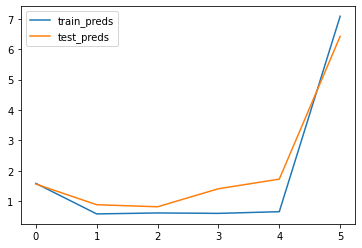

In [19]:
plt.plot(train_preds,label='train_preds')
plt.plot(test_preds,label='test_preds')
plt.legend()

1. * **From the Above Graph We can state at 4 and after 4 predictions were going wrong so we prefer to select degree for featurescalling less than 4
2. * we can choose 2 or 3. I tried choosing 3****

In [20]:
poly=PolynomialFeatures(degree=3,include_bias=False)
converted_x=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(converted_x,y,test_size=0.3,random_state=1)

In [21]:
#we will be trying various model of regression that were imported from linear_model and we will pick the model which has best score

models=[]
models.append(('linear_rigression',LinearRegression()))
models.append(('Ridge',Ridge(alpha=10.0)))
models.append(('RidgeCV',RidgeCV(alphas=(0.1,1.0,10.0),scoring="neg_mean_squared_error")))
models.append(('Lasso',Lasso()))
models.append(('LassoCV',LassoCV()))
models.append(('ElasticNet',ElasticNet()))
models.append(('ElasticNetCV',ElasticNetCV()))

models_score_MAE={}
models_score_RMSE={}
for i,name in models:
  clf=name
  clf.fit(x_train,y_train)
  y_preds=clf.predict(x_test)
  models_score_RMSE[i]=np.sqrt(mean_squared_error(y_test,y_preds))
  models_score_MAE[i]=mean_absolute_error(y_test,y_preds)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.80326e-34): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.958e+01, tolerance: 3.861e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.795e+01, tolerance: 3.861e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Ignore Above Warning it is due to max_iter in Lasso and LassoCV
If you dont want any kind of warning use max_iter>10000
Note:max_iter is onr of hyperparamter of Lasso and LassoCV

In [22]:
models_score_RMSE

{'linear_rigression': 0.8207855177011211,
 'Ridge': 5.129189559933313,
 'RidgeCV': 1.8775212495852636e+16,
 'Lasso': 1.0082459933121426,
 'LassoCV': 4.897040790878066,
 'ElasticNet': 1.0118049270943836,
 'ElasticNetCV': 4.897040790878066}

Text(0.5, 1.0, 'models_score_RMSE')

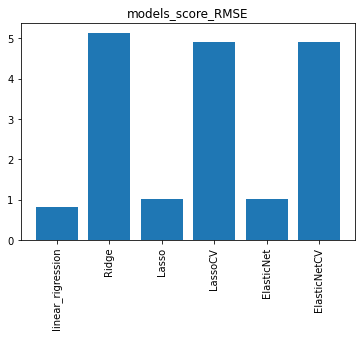

In [23]:
#Here we will remove RidgeCV score beacuse it is too high which of no use.we try to reduce score
models_score_RMSE.pop('RidgeCV')
plt.bar(x=models_score_RMSE.keys(),height=models_score_RMSE.values())
plt.xticks(rotation=90)
plt.title('models_score_RMSE')

In [24]:
models_score_MAE

{'linear_rigression': 0.5030225655504221,
 'Ridge': 0.954223882920176,
 'RidgeCV': 1.8319305224637492e+16,
 'Lasso': 0.6743393291071313,
 'LassoCV': 3.4267561736139416,
 'ElasticNet': 0.6689727413503431,
 'ElasticNetCV': 3.4267561736139416}

Text(0.5, 1.0, 'models_score_MAE')

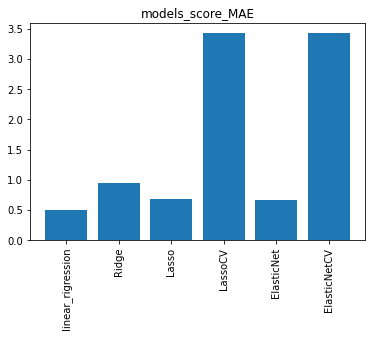

In [25]:
#Here we will remove RidgeCV score beacuse it is too high which of no use.we try to reduce score
models_score_MAE.pop('RidgeCV')
plt.bar(x=models_score_MAE.keys(),height=models_score_MAE.values())
plt.xticks(rotation=90)
plt.title('models_score_MAE')

1. * **From Both models_score_MAE and models_score_RMSE we can predict that linear_regression has low MAE and RMSE so we prefer LinearRegression()****

In [26]:
final_model=LinearRegression()
poly=PolynomialFeatures(degree=3,include_bias=False)
converted_x=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(converted_x,y,test_size=0.3,random_state=1)
final_model.fit(x_train,y_train)
y_preds=final_model.predict(x_test)
r2_score(y_test,y_preds)

0.9718185383453737